# 1. import library

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 20,10
%matplotlib inline

# 2. import data

In [3]:
df = pd.read_csv('0 Data/clean_data2.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.shape

(58693, 8)

In [4]:
x = df[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
y = df['Incidence']

# 3. tree (depth = 2)

In [5]:
dtree = tree.DecisionTreeRegressor(random_state=0, max_depth=2)
dtree = dtree.fit(x, y)

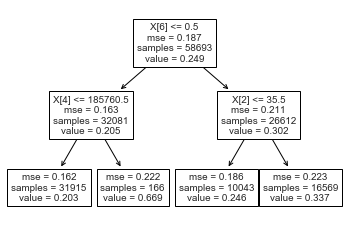

In [6]:
tree.plot_tree(dtree)
plt.savefig('out2.pdf')

# 3. tree (depth = 3)

In [7]:
dtree = tree.DecisionTreeRegressor(random_state=0, max_depth=3)
dtree = dtree.fit(x, y)

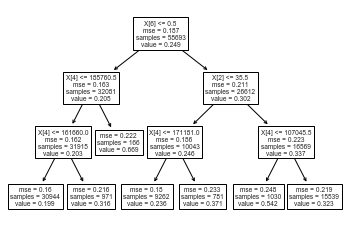

In [8]:
tree.plot_tree(dtree)
plt.savefig('out3.pdf')

# 5. segments

In [9]:
seg = {'Buy': y, 'seg':dtree.apply(x)}
seg = pd.DataFrame(seg)
seg_info = seg.groupby('seg')['Buy'].agg(['count', 'mean'])
seg_info

,count,mean
seg,,
3,30944,0.199392
4,971,0.316169
5,166,0.668675
8,9262,0.235802
9,781,0.371319
11,1030,0.541748
12,15539,0.322929


In [10]:
seg['seg_def'] = np.where(seg['seg'].isin([3,8]), 'Low', 
                          np.where(seg['seg'].isin([5,11]), 'High', 'Med'))
seg_info = seg.groupby('seg_def')['Buy'].agg(['count', 'mean'])
seg_info

,count,mean
seg_def,,
High,1196,0.559365
Low,40206,0.207780
Med,17291,0.324735
